## Financial Time Series Project
#### Task 1: Data analysis

First thing to do with the data is perform some *clean up*, in order to do that we wanna take a general look at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
file_path = "./spiff_data.csv"
data = pd.read_csv(file_path)

data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5456 non-null   int64  
 1   day           5456 non-null   int64  
 2   gurkor        5206 non-null   float64
 3   guitars       5206 non-null   float64
 4   slingshots    5206 non-null   float64
 5   stocks        5206 non-null   float64
 6   sugar         5206 non-null   float64
 7   water         5206 non-null   float64
 8   tranquillity  5206 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 383.8 KB


,Unnamed: 0,day,gurkor,guitars,slingshots,stocks,sugar,water,tranquillity
0,0,1,6.154653,2.794285,2.136536,10.653684,3.324896,3.896149,7.755880
1,1,2,6.189623,2.843068,2.113582,10.674465,3.355736,3.899915,7.781310
2,2,3,6.168641,2.839644,2.116336,10.822372,3.336461,3.897404,7.886205
3,3,4,6.156401,2.823384,2.096137,10.848804,3.288274,3.901170,7.848061
4,4,5,6.124929,2.832798,2.099810,10.860731,3.303694,3.905355,7.883026


In [2]:
data.describe()

,Unnamed: 0,day,gurkor,guitars,slingshots,stocks,sugar,water,tranquillity
count,5456.000000,5456.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,2727.500000,2728.500000,9.886550,6.713898,4.519504,7.309093,3.621403,6.749451,12.502258
std,1575.155865,1575.155865,30.785709,30.850516,30.883866,30.856220,30.904930,30.825744,30.774131
min,0.000000,1.000000,5.942896,2.629048,2.001362,4.012346,1.370262,3.739412,6.614749
25%,1363.750000,1364.750000,6.948963,4.258847,2.808930,4.917271,1.999489,4.996764,9.194215
50%,2727.500000,2728.500000,8.907936,5.912364,3.384898,5.521318,2.606234,5.775716,10.591227
75%,4091.250000,4092.250000,10.191398,7.058370,4.294821,6.977501,3.281805,6.492295,13.382072
max,5455.000000,5456.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


From the above we can notice two things, that the max value for each TS is 1000 which seems a bit odd and that there is some missing data.

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

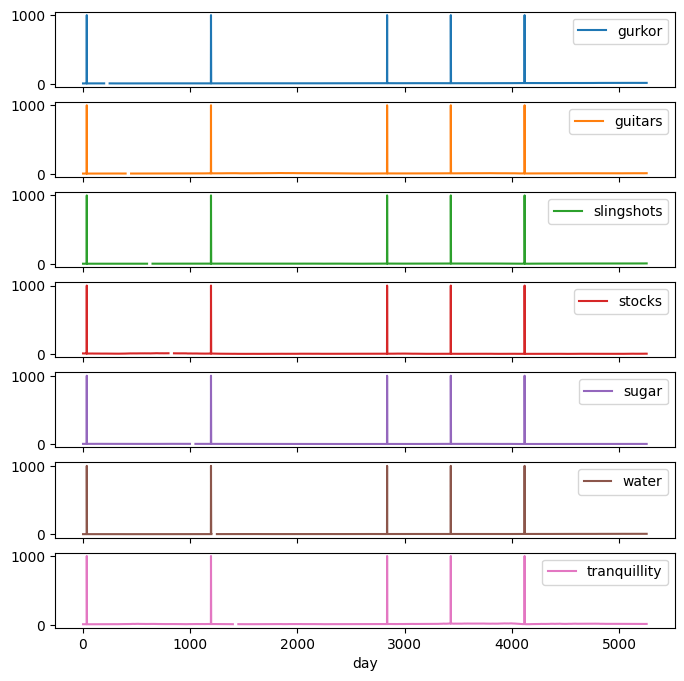

In [3]:
data.set_index("day", inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.plot(subplots=True, figsize=(8,8), )



##### We want to clean up the data by removing the spikes

<Axes: xlabel='day'>

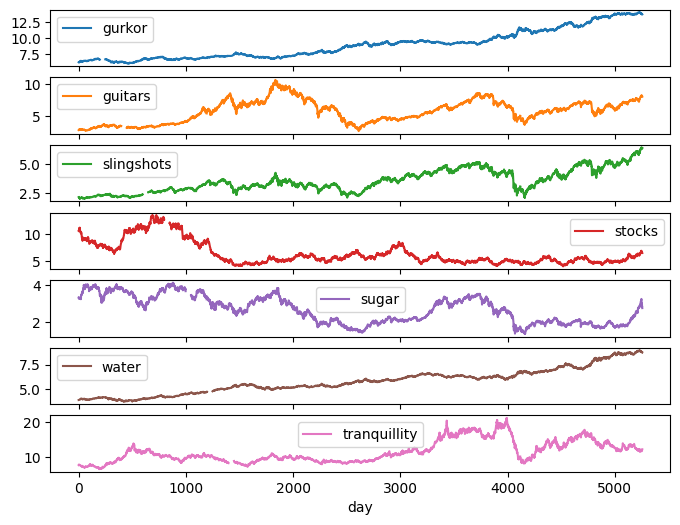

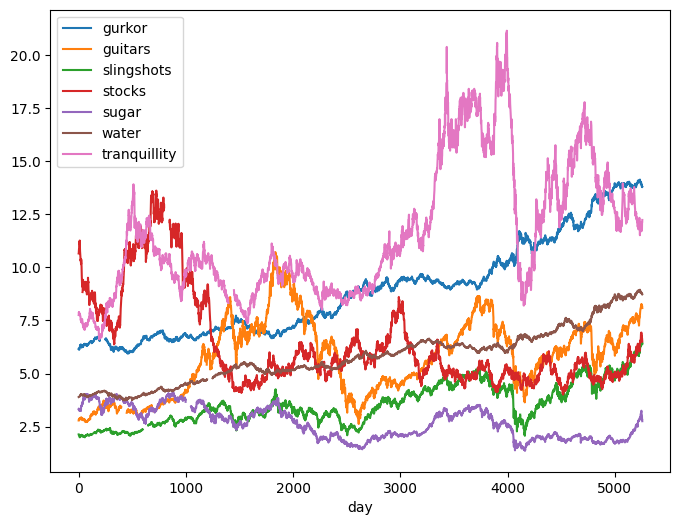

In [4]:
data_filtered = data.copy()

data_filtered[data_filtered >= 500] = np.nan
data_filtered.plot(subplots=True, figsize=(8,6), )
data_filtered.plot(figsize=(8,6))

The filtered result looks much better. From looking at the plots (gurkor, water) and (guitars, slingshots) seem to have a ?similar? trend. We also see a large market crash around day 4000 for a lot of them.

In [5]:
data_filtered.describe()

,gurkor,guitars,slingshots,stocks,sugar,water,tranquillity
count,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000
mean,8.934701,5.758999,3.562496,6.354767,2.663530,5.794586,11.552924
std,2.268289,1.756993,0.973406,2.139400,0.727010,1.275024,3.067634
min,5.942896,2.629048,2.001362,4.012346,1.370262,3.739412,6.614749
25%,6.947150,4.252728,2.804869,4.916920,1.999030,4.996563,9.186268
50%,8.905505,5.907840,3.383130,5.520531,2.605522,5.774852,10.584870
75%,10.183919,7.055568,4.291411,6.946382,3.279982,6.488217,13.380483
max,14.132395,10.719387,6.468982,13.613052,4.125193,8.949187,21.137953


array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

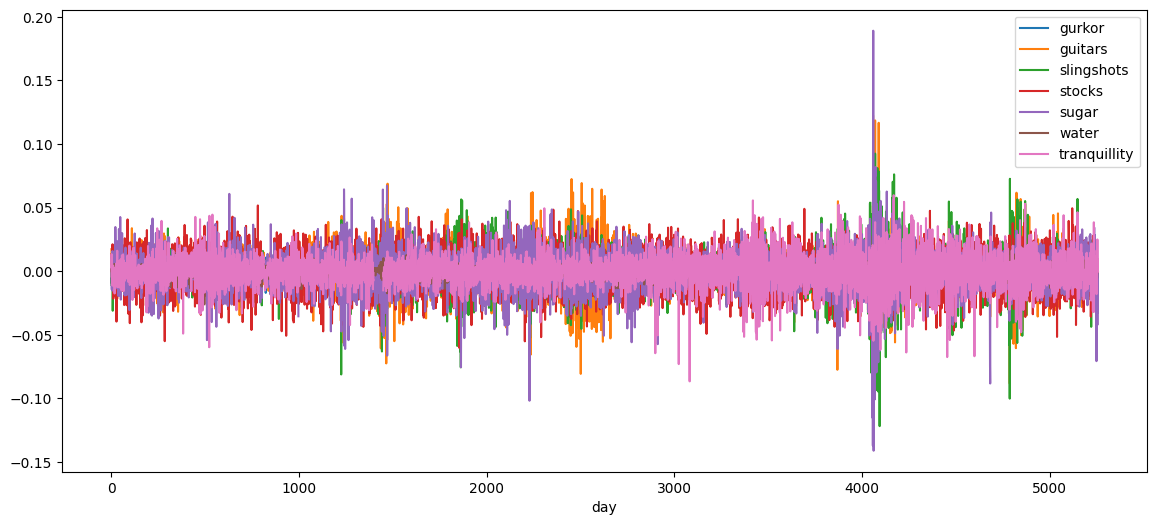

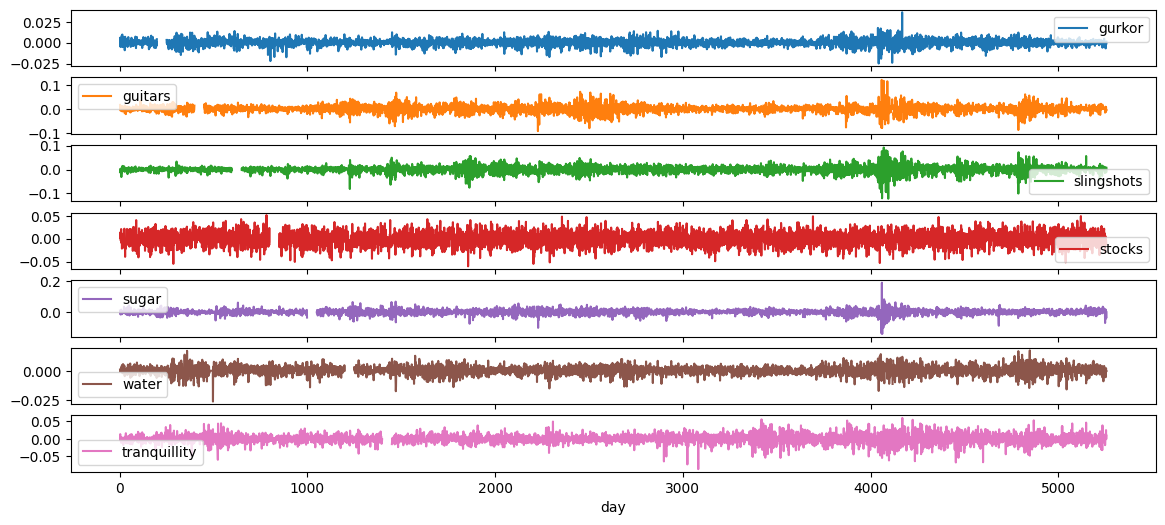

In [28]:
log_returns = np.log( data_filtered / data_filtered.shift(1))

log_returns.plot(figsize=(14,6))
log_returns.plot(subplots=True, figsize=(14,6))

#### Use ADF test to check if log returns are stationary. 
The log returns have no trend. Null hypo is *this series is non-stationary* if p-value is small enough we can reject this aka its stationary.

In [33]:
from statsmodels.tsa.stattools import adfuller

print("ADF Test Results (log returns):")
for col in log_returns.columns:
    result = adfuller(log_returns[col].dropna())
    print(f"{col}: ADF={result[0]:.4f}, p-value={result[1]:5f}")


ADF Test Results (log returns):
gurkor: ADF=-53.1885, p-value=0.000000
guitars: ADF=-12.1853, p-value=0.000000
slingshots: ADF=-19.1148, p-value=0.000000
stocks: ADF=-72.1206, p-value=0.000000
sugar: ADF=-36.8048, p-value=0.000000
water: ADF=-43.1526, p-value=0.000000
tranquillity: ADF=-73.5667, p-value=0.000000


#### Calculating the correlation between the log returns

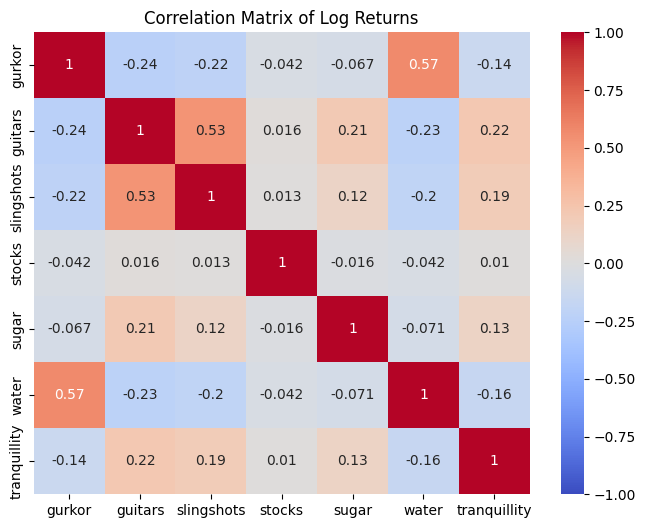

,gurkor,guitars,slingshots,stocks,sugar,water,tranquillity
gurkor,1.000000,-0.241075,-0.216712,-0.041636,-0.066739,0.573293,-0.137819
guitars,-0.241075,1.000000,0.526253,0.016316,0.211811,-0.226021,0.223933
slingshots,-0.216712,0.526253,1.000000,0.013391,0.118452,-0.201113,0.188563
stocks,-0.041636,0.016316,0.013391,1.000000,-0.015689,-0.042117,0.010027
sugar,-0.066739,0.211811,0.118452,-0.015689,1.000000,-0.071434,0.126743
water,0.573293,-0.226021,-0.201113,-0.042117,-0.071434,1.000000,-0.157992
tranquillity,-0.137819,0.223933,0.188563,0.010027,0.126743,-0.157992,1.000000


In [44]:
import seaborn as sns

corr_matrix = log_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Log Returns")
plt.show()

corr_matrix

Find high correlation for (water, gurkor) and (slingshots, guitars) as we guessed from the plots. A lot of pairs have mild correlation some like (stocks, tranquility) have none.

Need to find some tools to classify groups

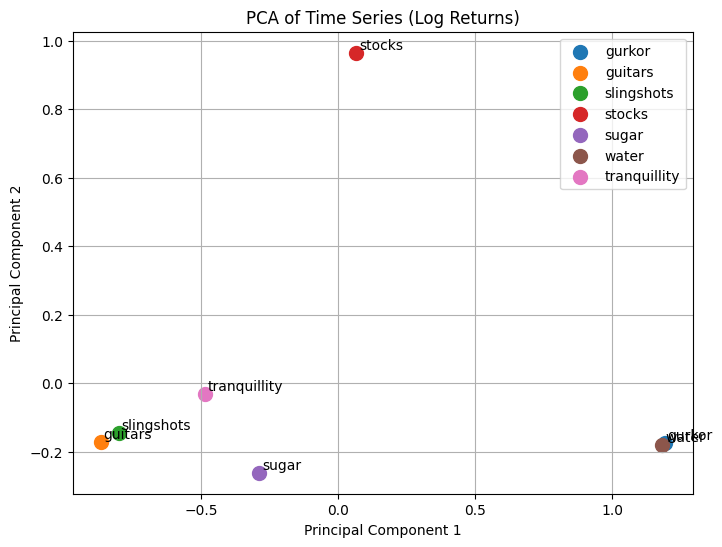

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(corr_matrix)

plt.figure(figsize=(8, 6))
for i, name in enumerate(corr_matrix.columns):
    plt.scatter(pca_components[i, 0], pca_components[i, 1], label=name, s=100)
    plt.text(pca_components[i, 0]+0.01, pca_components[i, 1]+0.01, name)

plt.title("PCA of Time Series (Log Returns)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

Need to understand PCA better